In [10]:
!pip install faiss-cpu
!pip install joblib

In [13]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
from google.colab.patches import cv2_imshow
import torch
from image_processing import *
from bovw import *

AttributeError: module 'numpy' has no attribute 'typeDict'

In [6]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
x_train_gray = []
x_test_gray = []

for img in x_train:
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  x_train_gray.append(gray)

for img in x_test:
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  x_test_gray.append(gray)


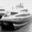

In [10]:
cv2_imshow(x_test_gray[1])

In [11]:
def extract_visual_features(gray_images, labels):
# Extract SIFT features from gray images
    # Define our feature extractor (SIFT)
    extractor = cv2.SIFT_create()

    keypoints = []
    descriptors = []

    for i, img in enumerate(gray_images):
        # extract keypoints and descriptors for each image
        img_keypoints, img_descriptors = extractor.detectAndCompute(img, None)
        if img_descriptors is not None:
            keypoints.append(img_keypoints)
            descriptors.append(img_descriptors)
        else:
          labels = np.delete(labels, i)
    return keypoints, descriptors, labels

In [12]:
train_features = []
test_features = []

_, train_features, y_train=extract_visual_features(x_train_gray, y_train)
_, test_features, y_test=extract_visual_features(x_test_gray, y_test)


In [13]:
len(train_features)

49904

In [14]:
len(test_features)

9976

In [15]:
y_train.size

49904

In [16]:
y_test.size

9976

In [ ]:
# train_features = joblib.load('train_sift.pkl')
# test_features = joblib.load('test_sift.pkl')

In [ ]:
# joblib.dump(train_features, "train_sift.pkl", compress=3)
# joblib.dump(test_features, "test_sift.pkl", compress=3)

['test_sift.pkl']

In [ ]:
# codebook=build_codebook(train_features, n_codewords = 300)

In [ ]:
#print(len(represent_image_features(train_features[0],codebook)))

300


In [ ]:
#save_codebook(codebook, 'z')

In [22]:
codebook = load_codebook('codebook_300.pkl')

In [23]:
# Tạo histogram cho tất cả ảnh
X_train_histograms = [represent_image_features(image,codebook) for image in train_features]

In [24]:
X_test_histograms = [represent_image_features(image,codebook) for image in test_features]

In [25]:
len(X_train_histograms)

49904

In [26]:
len(X_test_histograms)

9976

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

model=svm.SVC(kernel='linear', C=1)

for epoch in tqdm(range(5), desc="Training"):
    model.fit(X_train_histograms, y_train)

Training:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
print(f'Độ chính xác: {model.score(X_test_histograms,y_test)*100:.2f}%')

In [ ]:
#luu model
